In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Video

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

# Simulation Run

In [3]:
#define cell size and resolution
sx = 28
sy = 16

pt = mp.Vector3(-5,0)

resolution = 10

cell = mp.Vector3(sx, sy)

#gemetry params
cavity_w = 3.5*0.15/4
layer_w = 0.5
n_layer = 3

f_central = 0.15
df = 0.1

#define geometry
geometry = [mp.Block(mp.Vector3(10,mp.inf,mp.inf),
                     center=mp.Vector3(0,0),
                     material=mp.Medium(index=3.5))]

for ii in range(n_layer):
    geometry.append(mp.Block(mp.Vector3(layer_w,mp.inf,mp.inf),
                     center=mp.Vector3(cavity_w/2+layer_w/2+2*layer_w*ii,0),
                     material=mp.Medium(epsilon=1.45)))
    geometry.append(mp.Block(mp.Vector3(layer_w,mp.inf,mp.inf),
                     center=mp.Vector3(-cavity_w/2-layer_w/2-2*layer_w*ii,0),
                     material=mp.Medium(epsilon=1.45)))
#define sources
sources = [mp.Source(mp.GaussianSource(frequency=f_central, fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(-10,0),
                     size=mp.Vector3(0,5))]

#define boundary conditions
pml_layers = [mp.PML(1.0)]


#Instance simulation with chosen parameters
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [4]:
# Flux in point 1
refl_fr = mp.FluxRegion(center=mp.Vector3(-6, 0), size=mp.Vector3(0,12,0))
refl = sim.add_flux(f_central, df, 100, refl_fr)

In [5]:
# Flux in point 2
tran_fr = mp.FluxRegion(center=mp.Vector3(6, 0), size=mp.Vector3(0,12,0))
tran = sim.add_flux(f_central, df, 100, tran_fr)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000181913 s
Working in 2D dimensions.
Computational cell is 28 x 16 x 0 with resolution 10
     block, center = (0,0,0)
          size (10,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.25,12.25,12.25)
     block, center = (0.315625,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.45,1.45,1.45)
     block, center = (-0.315625,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.45,1.45,1.45)
     block, center = (1.31563,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.45,1.45,1.45)
     block, center = (-1.31563,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constan

FloatProgress(value=0.0, description='0% done ', max=900.0)

Meep progress: 589.0500000000001/900.0 = 65.5% done in 4.0s, 2.1s to go
on time step 11800 (time=590), 0.000339128 s/step
Normalizing field data...
run 0 finished at t = 900.0 (18000 timesteps)
Generating MP4...


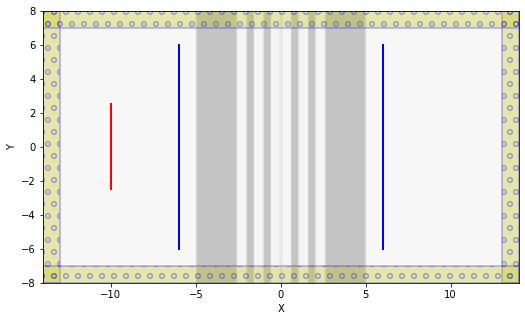

In [6]:
#Rusn simulation and save animation of Ez
animate = mp.Animate2D(sim,
                       fields=mp.Ez,
                       normalize=True,
                       realtime=False,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'spline36'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3})


sim.run(mp.at_every(1, animate), until=900)
        #until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

animate.to_mp4(10, "Ez.mp4")

In [7]:
Video("Ez.mp4") #Note: colorbar is not the same for each instant 

In [8]:
refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(refl)

T = np.array(tran_flux)/np.array(refl_flux)

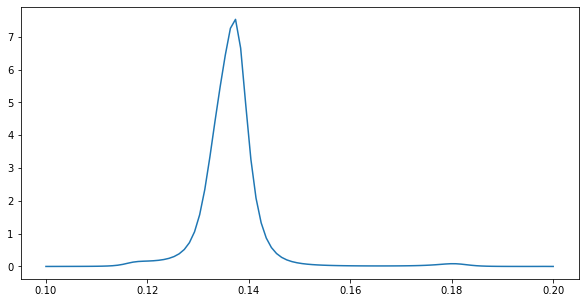

In [9]:
plt.plot(flux_freqs, tran_flux)

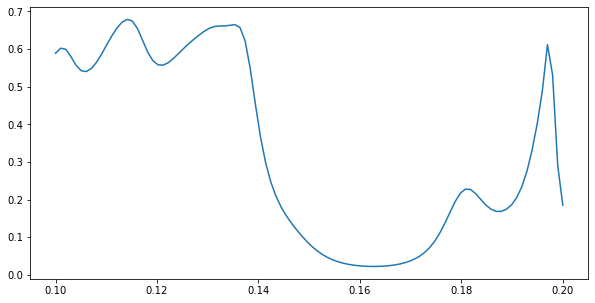

In [10]:
plt.plot(flux_freqs, T)